# T. kodakarensis histone dimer in silico pulldown results

We ran AlphaFold pulldowns with 5 different baits on the proteome of Thermococcus kodakarensis (strain ATCC BAA-918 / JCM 12380 / KOD1)

- Histone A ([Q9Y8I1](https://www.uniprot.org/uniprotkb/Q9Y8I1/entry)) — control
- Histone B ([Q9Y8I2](https://www.uniprot.org/uniprotkb/Q9Y8I2/entry)) — control
- Homodimer A+A
- Homodimer B+B
- Heterodimer A+B

In [99]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='colorblind', font_scale=1.1)
palette = sns.color_palette().as_hex()

base_folder = Path(os.path.expanduser('~')) / 'Documents' / 'afpd' / 'T_kodakarensis'

## 0) Metrics

We evaluate the quality of a predicted protein complexes using the metric defined in [Evans et al 2021 (preprint)](https://doi.org/10.1101/2021.10.04.463034):

`confidence = 0.8 * ipTM + 0.2 * pTM`

Where `pTM` is the predicted TM-score and `ipTM` is the interface-specific pTM score. These two scores are readily outputted by AlphaFold-multimer.

## 1) Homodimer A+A

In [100]:
bait_id = 'Q9Y8I1__Q9Y8I1'
control_id = 'Q9Y8I1'

In [101]:
bait_df = pd.read_csv(
    base_folder / 'outputs' / f'{bait_id}_pulldown_scores_annotated.csv', 
    index_col='target_uniprot_id',
).drop('dockq', axis='columns')
bait_df['rank'] = [i+1 for i in range(len(bait_df))]

control_df = pd.read_csv(
    base_folder / 'outputs' / f'{control_id}_pulldown_scores_annotated.csv',
    index_col='target_uniprot_id',
)

# Compute the difference in score versus control (bait confidence minus control confidence)
def compute_diff_with_ctrl(control_df):
    ctrl_index = control_df.index

    def fn(row):
        target_id = row.name

        confidence = row['confidence']
        if target_id in ctrl_index:
            confidence_ctrl = control_df.loc[target_id, 'confidence']

            return confidence - confidence_ctrl
        else:
            return np.nan
        
    return fn


bait_df['ctrl_diff'] = bait_df.apply(compute_diff_with_ctrl(control_df), axis=1)
bait_df_sorted = bait_df.sort_values('ctrl_diff', ascending=False)

Histogram of the distribution of scores (control vs bait)

Text(0.5, 1.0, 'Homodimer (A+A)')

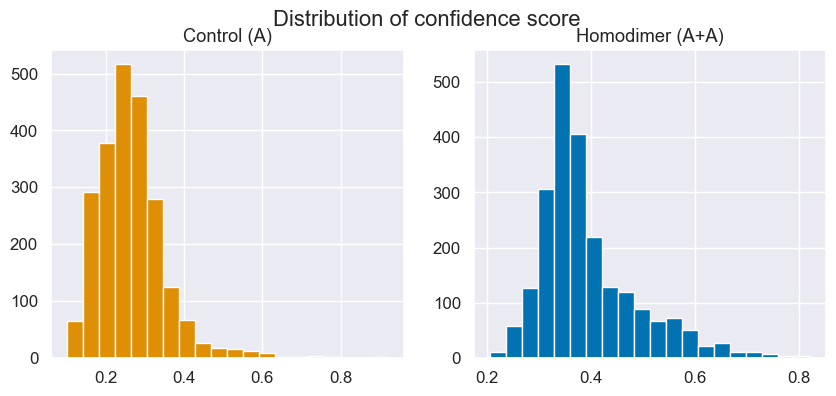

In [143]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()
ax_ctrl = axes[0]
ax_bait = axes[1]

control_df['confidence'].hist(ax=ax_ctrl, bins=20, color=palette[1]);
bait_df['confidence'].hist(ax=ax_bait, bins=20);

f.suptitle('Distribution of confidence score');
ax_ctrl.set_title('Control (A)')
ax_bait.set_title('Homodimer (A+A)')

The following histogram shows that more interactors with decent scores are found when baiting with the dimer than with the monomer.

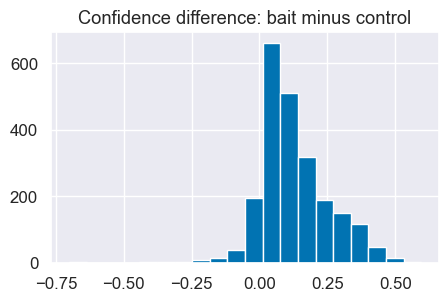

In [113]:
ax = bait_df['ctrl_diff'].hist(bins=20, figsize=(5, 3));
ax.set_title('Confidence difference: bait minus control');

The starkest negative differences are Histone A and Histone B, that drop from 1st and 2nd place in the control (monomer) to 2,265 (essentially last) and 362 respectively in the homodimer. No Homotrimer predicted. Probably no heterotrimer either.

In [104]:
bait_df_sorted.tail()

,id,plddt,ptm,iptm,confidence,target_description,rank,ctrl_diff
target_uniprot_id,,,,,,,,
Q5JDK9,Q9Y8I1__Q9Y8I1__Q5JDK9,54.44,0.32,0.24,0.256,CARDB domain-containing protein OS=Thermococcu...,2221,-0.276
Q5JI09,Q9Y8I1__Q9Y8I1__Q5JI09,92.62,0.74,0.33,0.412,"Oxidoreductase, aldo/keto reductase family OS=...",671,-0.346
Q5JES5,Q9Y8I1__Q9Y8I1__Q5JES5,86.92,0.68,0.27,0.352,"Lipoate-protein ligase A, N-terminal section O...",1344,-0.374
Q9Y8I2,Q9Y8I1__Q9Y8I1__Q9Y8I2,76.27,0.57,0.46,0.482,Archaeal histone B OS=Thermococcus kodakarensi...,362,-0.428
Q9Y8I1,Q9Y8I1__Q9Y8I1__Q9Y8I1,67.78,0.41,0.17,0.218,Archaeal histone A OS=Thermococcus kodakarensi...,2265,-0.702


At the top of the list, most hits are fairing better than in the control (save for DprA which is high in the control too):

In [105]:
bait_df[bait_df['confidence'] > 0.7]

,id,plddt,ptm,iptm,confidence,target_description,rank,ctrl_diff
target_uniprot_id,,,,,,,,
Q5JD83,Q9Y8I1__Q9Y8I1__Q5JD83,90.33,0.87,0.81,0.822,Uncharacterized protein OS=Thermococcus kodaka...,1,0.210
Q5JEV1,Q9Y8I1__Q9Y8I1__Q5JEV1,92.54,0.88,0.80,0.816,Exonuclease SbcD homolog OS=Thermococcus kodak...,2,0.422
Q5JIN1,Q9Y8I1__Q9Y8I1__Q5JIN1,93.57,0.83,0.80,0.806,Uncharacterized protein OS=Thermococcus kodaka...,3,0.596
Q5JJ15,Q9Y8I1__Q9Y8I1__Q5JJ15,90.49,0.82,0.78,0.788,"Hypothetical membrane protein, conserved OS=Th...",4,0.024
Q5JGS6,Q9Y8I1__Q9Y8I1__Q5JGS6,91.50,0.81,0.77,0.778,Uncharacterized protein OS=Thermococcus kodaka...,5,0.524
Q5JI67,Q9Y8I1__Q9Y8I1__Q5JI67,94.15,0.82,0.76,0.772,DUF3368 domain-containing protein OS=Thermococ...,6,0.532
Q5JE08,Q9Y8I1__Q9Y8I1__Q5JE08,92.52,0.79,0.74,0.750,Nucleotidyltransferase OS=Thermococcus kodakar...,7,0.494
Q5JJB5,Q9Y8I1__Q9Y8I1__Q5JJB5,86.66,0.81,0.73,0.746,Uncharacterized protein OS=Thermococcus kodaka...,8,0.446
Q5JHQ7,Q9Y8I1__Q9Y8I1__Q5JHQ7,95.08,0.81,0.73,0.746,FCP1 homology domain-containing protein OS=The...,9,0.400


The very top hit is an uncharacterized protein, conserved and with good plDDT accordign to AlphaFold, but with no annotation whatsoever.

The second hit is an homolog of Exonuclease SbcD ([Q5JEV1](https://www.uniprot.org/uniprotkb/Q5JEV1/entry)). There are also other DNA associated proteins including a Nucleotidyltransferase, a protein annotated as "Nucleic acid-binding protein" and a protein predicted to be involved in DNA repair (DprA).

## 2) Homodimer B+B

In [106]:
bait2_id = 'Q9Y8I2__Q9Y8I2'
control2_id = 'Q9Y8I2'

In [107]:
bait2_df = pd.read_csv(
    base_folder / 'outputs' / f'{bait2_id}_pulldown_scores_annotated.csv', 
    index_col='target_uniprot_id',
).drop('dockq', axis='columns')
bait2_df['rank'] = [i+1 for i in range(len(bait2_df))]

control2_df = pd.read_csv(
    base_folder / 'outputs' / f'{control2_id}_pulldown_scores_annotated.csv',
    index_col='target_uniprot_id',
)

bait2_df['ctrl_diff'] = bait2_df.apply(compute_diff_with_ctrl(control2_df), axis=1)

We see a similar shift in distribution in the second homodimer (B+B)

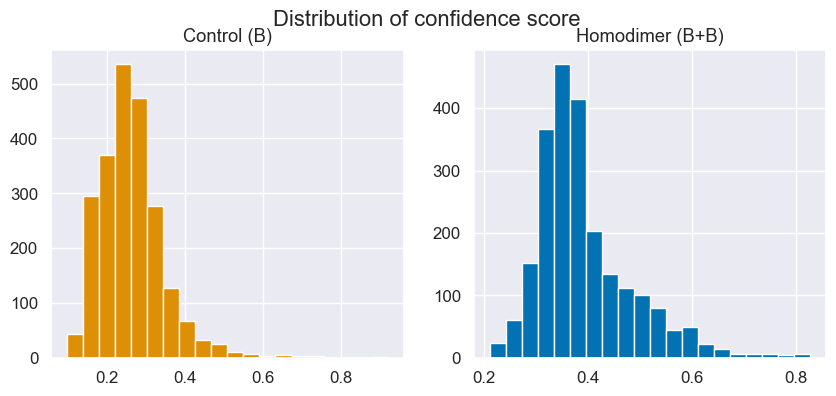

In [110]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()
ax_ctrl = axes[0]
ax_bait = axes[1]

control2_df['confidence'].hist(ax=ax_ctrl, bins=20, color=palette[1]);
bait2_df['confidence'].hist(ax=ax_bait, bins=20);

ax_ctrl.set_title('Control (B)')
ax_bait.set_title('Homodimer (B+B)')
f.suptitle('Distribution of confidence score');

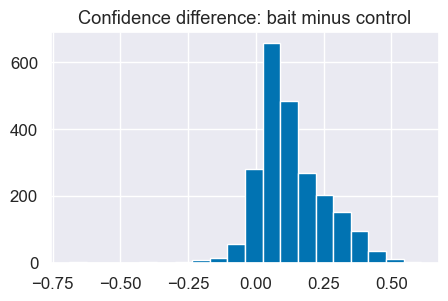

In [112]:
ax = bait2_df['ctrl_diff'].hist(bins=20, figsize=(5, 3));
ax.set_title('Confidence difference: bait minus control');

There are differences in the very top proteins vs A+A.

In [122]:
bait2_df['A+A_diff'] = bait2_df.apply(compute_diff_with_ctrl(bait_df), axis=1)

bait2_df[bait2_df['confidence'] > 0.7]

,id,plddt,ptm,iptm,confidence,target_description,rank,ctrl_diff,A+A_diff
target_uniprot_id,,,,,,,,,
Q5JHZ6,Q9Y8I2__Q9Y8I2__Q5JHZ6,95.66,0.86,0.82,0.828,"Peroxiredoxin, AhpC/TSA family OS=Thermococcus...",1,0.552,0.426
Q5JI31,Q9Y8I2__Q9Y8I2__Q5JI31,94.38,0.84,0.82,0.824,"Predicted nucleic acid-binding protein, contai...",2,0.142,0.124
Q5JD15,Q9Y8I2__Q9Y8I2__Q5JD15,92.77,0.85,0.81,0.818,DprA winged helix domain-containing protein OS...,3,0.092,0.102
Q5JDP9,Q9Y8I2__Q9Y8I2__Q5JDP9,94.62,0.84,0.81,0.816,Nitrosopumilus output domain-containing protei...,4,0.610,0.254
Q5JD81,Q9Y8I2__Q9Y8I2__Q5JD81,93.00,0.86,0.80,0.812,Uncharacterized protein OS=Thermococcus kodaka...,5,0.516,0.272
Q5JI61,Q9Y8I2__Q9Y8I2__Q5JI61,93.19,0.88,0.79,0.808,Polysaccharide deacetylase OS=Thermococcus kod...,6,0.556,0.432
Q5JEI7,Q9Y8I2__Q9Y8I2__Q5JEI7,89.23,0.83,0.78,0.790,Uncharacterized protein OS=Thermococcus kodaka...,7,0.406,0.138
Q5JHC2,Q9Y8I2__Q9Y8I2__Q5JHC2,93.45,0.87,0.77,0.790,Uncharacterized protein OS=Thermococcus kodaka...,8,0.498,0.390
Q5JHF5,Q9Y8I2__Q9Y8I2__Q5JHF5,83.94,0.81,0.77,0.778,"ATPase involved in chromosome partitioning, Pa...",9,0.522,0.282


Where is exonuclease SbdC (Q5JEV1)? All the way down to rank 500 with a low-ish score.

In [127]:
bait2_df.loc[['Q5JEV1']]

,id,plddt,ptm,iptm,confidence,target_description,rank,ctrl_diff,A+A_diff
target_uniprot_id,,,,,,,,,
Q5JEV1,Q9Y8I2__Q9Y8I2__Q5JEV1,88.1,0.68,0.38,0.44,Exonuclease SbcD homolog OS=Thermococcus kodak...,503,0.072,-0.376


## 3) Heterodimer A+B

In [131]:
bait1__2_id = 'Q9Y8I1__Q9Y8I2'

bait1__2_df = pd.read_csv(
    base_folder / 'outputs' / f'{bait1__2_id}_pulldown_scores_annotated.csv', 
    index_col='target_uniprot_id',
).drop('dockq', axis='columns')
bait1__2_df['rank'] = [i+1 for i in range(len(bait1__2_df))]

bait1__2_df['ctrlA_diff'] = bait1__2_df.apply(compute_diff_with_ctrl(control_df), axis=1)
bait1__2_df['ctrlB_diff'] = bait1__2_df.apply(compute_diff_with_ctrl(control2_df), axis=1)
bait1__2_df['A+A_diff'] = bait1__2_df.apply(compute_diff_with_ctrl(bait_df), axis=1)
bait1__2_df['B+B_diff'] = bait1__2_df.apply(compute_diff_with_ctrl(bait2_df), axis=1)

Distribution of confidence score:

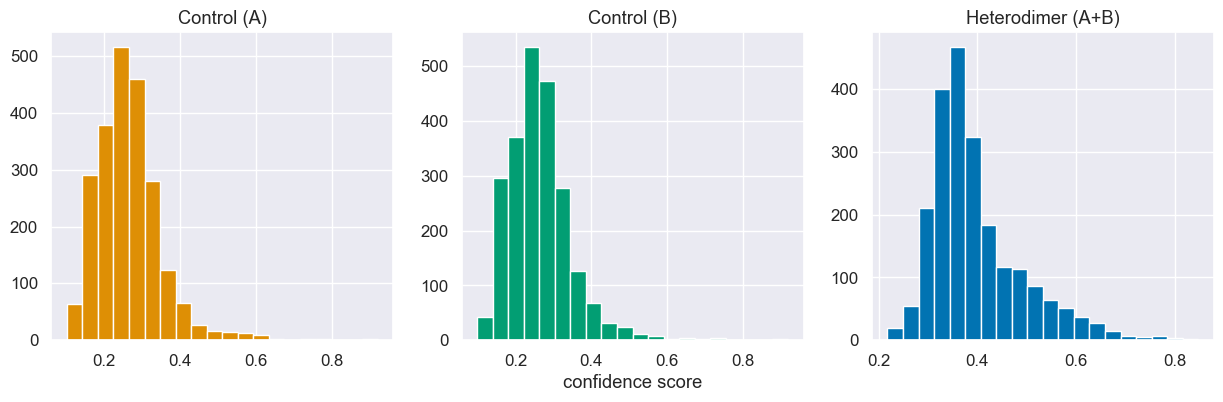

In [139]:
f, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
ax_ctrlA = axes[0]
ax_ctrlB = axes[1]
ax_bait = axes[2]

control_df['confidence'].hist(ax=ax_ctrlA, bins=20, color=palette[1]);
control2_df['confidence'].hist(ax=ax_ctrlB, bins=20, color=palette[2]);
bait1__2_df['confidence'].hist(ax=ax_bait, bins=20);

ax_ctrlB.set_xlabel('confidence score')

ax_ctrlA.set_title('Control (A)')
ax_ctrlB.set_title('Control (B)')
ax_bait.set_title('Heterodimer (A+B)');

Top hits:

In [138]:
bait1__2_df[bait1__2_df['confidence'] > 0.7]

,id,plddt,ptm,iptm,confidence,target_description,rank,ctrlA_diff,ctrlB_diff,A+A_diff,B+B_diff
target_uniprot_id,,,,,,,,,,,
Q5JEI7,Q9Y8I1__Q9Y8I2__Q5JEI7,90.94,0.88,0.84,0.848,Uncharacterized protein OS=Thermococcus kodaka...,1,0.428,0.464,0.196,0.058
Q5JD93,Q9Y8I1__Q9Y8I2__Q5JD93,92.26,0.86,0.82,0.828,DUF2283 domain-containing protein OS=Thermococ...,2,0.628,0.620,0.300,0.290
Q5JJ15,Q9Y8I1__Q9Y8I2__Q5JJ15,90.91,0.84,0.81,0.816,"Hypothetical membrane protein, conserved OS=Th...",3,0.052,0.096,0.028,0.054
Q5JD97,Q9Y8I1__Q9Y8I2__Q5JD97,95.34,0.87,0.79,0.806,Aspartate racemase OS=Thermococcus kodakarensi...,4,0.304,0.570,0.092,0.386
Q5JGE7,Q9Y8I1__Q9Y8I2__Q5JGE7,94.53,0.82,0.78,0.788,Uncharacterized protein OS=Thermococcus kodaka...,5,0.394,0.482,0.290,0.224
Q5JEP9,Q9Y8I1__Q9Y8I2__Q5JEP9,94.15,0.85,0.77,0.786,Phosphate import ATP-binding protein PstB OS=T...,6,0.524,0.506,0.134,0.024
Q5JH17,Q9Y8I1__Q9Y8I2__Q5JH17,92.53,0.89,0.75,0.778,"Hypothetical membrane protein, conserved OS=Th...",7,0.438,0.354,0.284,0.348
Q5JDG4,Q9Y8I1__Q9Y8I2__Q5JDG4,89.88,0.85,0.76,0.778,Universal stress protein OS=Thermococcus kodak...,8,0.498,0.532,0.322,0.104
Q5JI31,Q9Y8I1__Q9Y8I2__Q5JI31,93.39,0.80,0.77,0.776,"Predicted nucleic acid-binding protein, contai...",9,0.156,0.094,0.076,-0.048
